In [1]:
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import sqlite3
import plotly.express as px
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
import math

from useful_functions import *

In [2]:
tables_to_join = ["tPlantMicrobeGenera", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(277695, 15)

In [3]:
full_df = full_df.T.drop_duplicates().T

In [4]:
full_df.head()

,sample_id,genera,relative_abundance,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.0,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL2,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.01333,RRL,6/25/2021,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.02583,0.005592
2,RRL3,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.0,RRL,6/25/2021,0.778046,0.221954,exaltata,0.18775,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.00943,RRL,6/25/2021,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.00581,RRL,6/25/2021,0.572487,0.427513,exaltata,0.099801,0.0898,0.000613,-0.004979,0.017524


In [5]:
full_df.shape

(277695, 13)

In [7]:
df = full_df.copy()
subdf = df.copy()
origin_pivoted_df = subdf.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='genera', values='relative_abundance')
origin_pivoted_df.shape

(165, 1683)

In [63]:
sample_list = df['sample_id'].unique()
sample_list

'RRL1'

In [ ]:
df[df['relative_abundance'] = 6.20912]

In [89]:
for i in sample_list:
    val = df[df["sample_id"] == i]['relative_abundance'].max()
    x = (df[df['relative_abundance'] == val]['genera'])
    y = x.tolist()
    print(y)

['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Firmicutes|Clostridia|Clostridiales|Clostridiaceae|Clostridium']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria

['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus']
['Bacteria|Cyanobacteria|

In [86]:
y = x.tolist()
y[0].split('|')[1]

'Cyanobacteria'

In [75]:
print('Bacteria|Cyanobacteria||Synechococcales|Synec' in df['genera'])

False


In [44]:
origin_pivoted_df['Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum']

sample_id  site_id  species   V2      
CMB10      CMB      syriaca   0.999777        0.0
CMB11      CMB      syriaca   1.000000        0.0
CMB13      CMB      syriaca   0.989131        0.0
CMB14      CMB      syriaca   0.999992        0.0
CMB15      CMB      syriaca   0.998548    0.02993
                                           ...   
SLG3       SLG      exaltata  0.448157        0.0
SLG4       SLG      exaltata  0.412527        0.0
SLG5       SLG      exaltata  0.307915        0.0
SLG6       SLG      exaltata  0.482944        0.0
SLG8       SLG      syriaca   0.999504    0.03363
Name: Archaea|Euryarchaeota|Halobacteria|Halobacteriales|Haloarculaceae|Halapricum, Length: 165, dtype: object

In [23]:
genera_list = []
value_list = []
for i in origin_pivoted_df.columns:
    genera_list.append(i)
    value_list.append(sum(origin_pivoted_df[i]))

In [32]:
value_list.sort(reverse = True)
value_list[0:10]

[905.1327099999999,
 520.5177100000001,
 274.84986000000004,
 190.30445000000006,
 190.16735000000006,
 143.20207999999997,
 136.61874000000003,
 105.85389000000005,
 99.89197000000001,
 94.59135000000005]

<BarContainer object of 1683 artists>

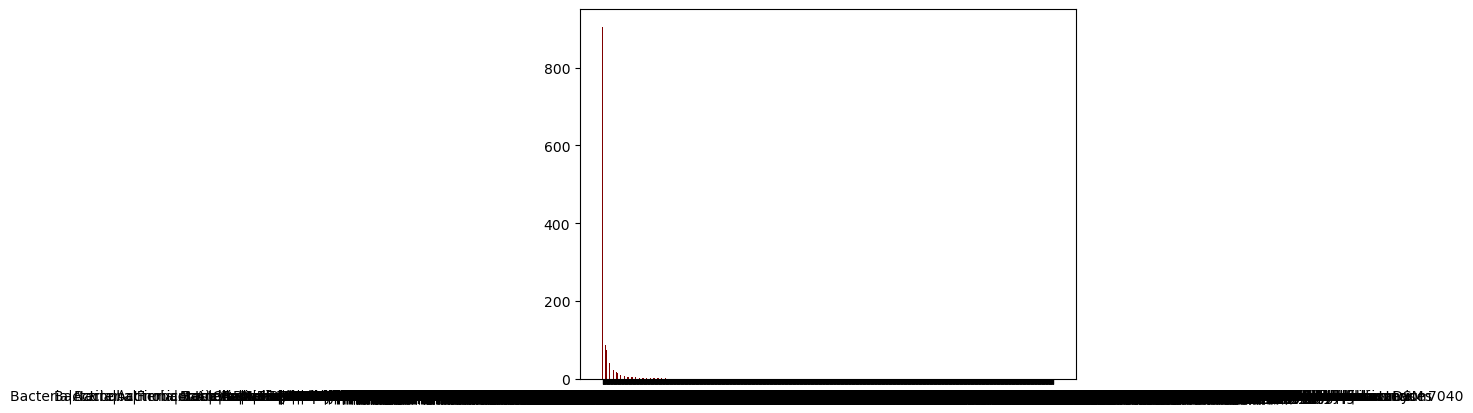

In [33]:
plt.bar(genera_list, value_list, color ='maroon', width = 0.4)

In [14]:
test_df = origin_pivoted_df.drop(['species'], axis = 1)
test_df.head()

KeyError: "['species'] not found in axis"

In [90]:
df1 = pd.read_csv('plant_microbe_phylum.csv')

In [91]:
df1.head()

,Unnamed: 0,sample_id,Site,Archaea|Crenarchaeota,Archaea|Euryarchaeota,Archaea|Thaumarchaeota,Bacteria|Abditibacteriota,Bacteria|Acidobacteria,Bacteria|Actinobacteria,Bacteria|Aquificae,...,Eukaryota|Bacillariophyta,Eukaryota|Basidiomycota,Eukaryota|Blastocladiomycota,Eukaryota|Chlorophyta,Eukaryota|Chytridiomycota,Eukaryota|Cryptomycota,Eukaryota|Microsporidia,Eukaryota|Mucoromycota,Eukaryota|Streptophyta,Eukaryota|Zoopagomycota
0,0,RRL1,RRL,0.0,0.17797,0.0,0.0,0.08643,4.71047,0.14310,...,0.00033,0.09698,0.0,0.04030,0.0,0.00016,0.00073,0.00599,0.0,0.0
1,1,RRL2,RRL,0.0,0.15614,0.0,0.0,0.00198,4.87482,0.20014,...,0.00050,0.06678,0.0,0.02993,0.0,0.00051,0.00049,0.00390,0.0,0.0
2,2,RRL3,RRL,0.0,0.17023,0.0,0.0,0.08687,3.52737,0.10634,...,0.00045,0.07855,0.0,0.03326,0.0,0.00032,0.00040,0.00311,0.0,0.0
3,3,RRL4,RRL,0.0,0.15893,0.0,0.0,0.05855,4.61111,0.11605,...,0.00026,0.06440,0.0,0.03055,0.0,0.00055,0.00039,0.00539,0.0,0.0
4,4,RRL5,RRL,0.0,0.14098,0.0,0.0,0.00024,3.05559,0.13950,...,0.00027,0.03485,0.0,0.02211,0.0,0.00023,0.00049,0.00220,0.0,0.0


In [94]:
df1 = df1.drop(['Unnamed: 0'], axis =1)

In [96]:
df1.head()

,sample_id,Site,Archaea|Crenarchaeota,Archaea|Euryarchaeota,Archaea|Thaumarchaeota,Bacteria|Abditibacteriota,Bacteria|Acidobacteria,Bacteria|Actinobacteria,Bacteria|Aquificae,Bacteria|Armatimonadetes,...,Eukaryota|Bacillariophyta,Eukaryota|Basidiomycota,Eukaryota|Blastocladiomycota,Eukaryota|Chlorophyta,Eukaryota|Chytridiomycota,Eukaryota|Cryptomycota,Eukaryota|Microsporidia,Eukaryota|Mucoromycota,Eukaryota|Streptophyta,Eukaryota|Zoopagomycota
0,RRL1,RRL,0.0,0.17797,0.0,0.0,0.08643,4.71047,0.14310,0.0,...,0.00033,0.09698,0.0,0.04030,0.0,0.00016,0.00073,0.00599,0.0,0.0
1,RRL2,RRL,0.0,0.15614,0.0,0.0,0.00198,4.87482,0.20014,0.0,...,0.00050,0.06678,0.0,0.02993,0.0,0.00051,0.00049,0.00390,0.0,0.0
2,RRL3,RRL,0.0,0.17023,0.0,0.0,0.08687,3.52737,0.10634,0.0,...,0.00045,0.07855,0.0,0.03326,0.0,0.00032,0.00040,0.00311,0.0,0.0
3,RRL4,RRL,0.0,0.15893,0.0,0.0,0.05855,4.61111,0.11605,0.0,...,0.00026,0.06440,0.0,0.03055,0.0,0.00055,0.00039,0.00539,0.0,0.0
4,RRL5,RRL,0.0,0.14098,0.0,0.0,0.00024,3.05559,0.13950,0.0,...,0.00027,0.03485,0.0,0.02211,0.0,0.00023,0.00049,0.00220,0.0,0.0


In [98]:
microbe_cols = df1.columns.drop(['sample_id', 'Site'])
microbe_cols

Index(['Archaea|Crenarchaeota', 'Archaea|Euryarchaeota',
       'Archaea|Thaumarchaeota', 'Bacteria|Abditibacteriota',
       'Bacteria|Acidobacteria', 'Bacteria|Actinobacteria',
       'Bacteria|Aquificae', 'Bacteria|Armatimonadetes',
       'Bacteria|Bacteroidetes', 'Bacteria|Balneolaeota',
       'Bacteria|Calditrichaeota', 'Bacteria|Candidatus Aerophobetes',
       'Bacteria|Candidatus Aminicenantes', 'Bacteria|Candidatus Atribacteria',
       'Bacteria|Candidatus Buchananbacteria',
       'Bacteria|Candidatus Cloacimonetes',
       'Bacteria|Candidatus Curtissbacteria',
       'Bacteria|Candidatus Dadabacteria',
       'Bacteria|Candidatus Desantisbacteria',
       'Bacteria|Candidatus Doudnabacteria',
       'Bacteria|Candidatus Eisenbacteria',
       'Bacteria|Candidatus Falkowbacteria',
       'Bacteria|Candidatus Fermentibacteria',
       'Bacteria|Candidatus Gottesmanbacteria',
       'Bacteria|Candidatus Gracilibacteria',
       'Bacteria|Candidatus Hydrogenedentes',
       

In [104]:
df1[microbe_cols] = StandardScaler().fit_transform(df1[microbe_cols])  

X = df1[microbe_cols]
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

In [106]:
x_list = []
y_list = []
for val in principal_components:
    x_list.append(val[0])
    y_list.append(val[1])

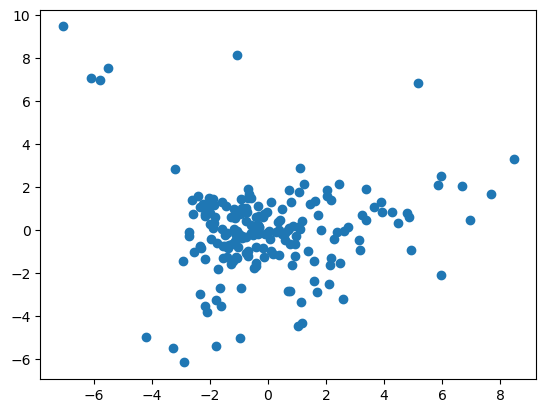

In [111]:
plt.scatter(x_list, y_list)